In [456]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import math

In [457]:
%matplotlib inline

### Import data

In [458]:
#tweb = pd.read_csv('t_web.csv')
tweb = pd.read_csv('t_kjv.csv')
key = pd.read_csv('key_english.csv')
keygenre = pd.read_csv('key_genre_english.csv')


In [459]:
type(tweb['field.4'][3])

str

In [460]:
key.head()

,field,field.1,field.2,field.3
0,1,Genesis,OT,1
1,2,Exodus,OT,1
2,3,Leviticus,OT,1
3,4,Numbers,OT,1
4,5,Deuteronomy,OT,1


In [461]:
key.columns = ["id","bookname","testament","genrenum"]

In [462]:
def padbooks(d):
    if d <= 9:
        return '{:>02d}'.format(d)
    else:
        return '{:<02d}'.format(d)

In [463]:
key['bookpad'] = key['id'].apply(padbooks)
key.head(12)

,id,bookname,testament,genrenum,bookpad
0,1,Genesis,OT,1,01
1,2,Exodus,OT,1,02
2,3,Leviticus,OT,1,03
3,4,Numbers,OT,1,04
4,5,Deuteronomy,OT,1,05
5,6,Joshua,OT,2,06
6,7,Judges,OT,2,07
7,8,Ruth,OT,2,08
8,9,1 Samuel,OT,2,09
9,10,2 Samuel,OT,2,10


In [464]:
tweb.head()

,field,field.1,field.2,field.3,field.4
0,1001001,1,1,1,In the beginning God created the heaven and th...
1,1001002,1,1,2,"And the earth was without form, and void; and ..."
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,1,1,5,"And God called the light Day, and the darkness..."


In [465]:
tweb.columns = ["id","booknum","chnum","versenum","text"]


In [466]:
tweb['id'] = tweb['id'].apply('{:>08d}'.format)

In [467]:
tweb.head()


,id,booknum,chnum,versenum,text
0,01001001,1,1,1,In the beginning God created the heaven and th...
1,01001002,1,1,2,"And the earth was without form, and void; and ..."
2,01001003,1,1,3,"And God said, Let there be light: and there wa..."
3,01001004,1,1,4,"And God saw the light, that it was good: and G..."
4,01001005,1,1,5,"And God called the light Day, and the darkness..."


In [468]:
keygenre.head()

,field,field.1
0,1,Law
1,2,History
2,3,Wisdom
3,4,Prophets
4,5,Gospels


In [469]:
keygenre.columns = ["id","genre"]


### Merge key data set with genre book name with main data

In [470]:
#tweb = tweb.merge(key, left_on='field.1', right_on='field', how='outer')
tweb = tweb.merge(key, left_on='booknum', right_on='id', how='outer')

In [471]:
tweb.head()


,id_x,booknum,chnum,versenum,text,id_y,bookname,testament,genrenum,bookpad
0,01001001,1,1,1,In the beginning God created the heaven and th...,1,Genesis,OT,1,01
1,01001002,1,1,2,"And the earth was without form, and void; and ...",1,Genesis,OT,1,01
2,01001003,1,1,3,"And God said, Let there be light: and there wa...",1,Genesis,OT,1,01
3,01001004,1,1,4,"And God saw the light, that it was good: and G...",1,Genesis,OT,1,01
4,01001005,1,1,5,"And God called the light Day, and the darkness...",1,Genesis,OT,1,01


In [472]:
#tweb.drop(['field_y'],axis=1,inplace=True)
tweb.drop(['id_y'],axis=1,inplace=True)
tweb.head()


,id_x,booknum,chnum,versenum,text,bookname,testament,genrenum,bookpad
0,01001001,1,1,1,In the beginning God created the heaven and th...,Genesis,OT,1,01
1,01001002,1,1,2,"And the earth was without form, and void; and ...",Genesis,OT,1,01
2,01001003,1,1,3,"And God said, Let there be light: and there wa...",Genesis,OT,1,01
3,01001004,1,1,4,"And God saw the light, that it was good: and G...",Genesis,OT,1,01
4,01001005,1,1,5,"And God called the light Day, and the darkness...",Genesis,OT,1,01


### Merge genre name data set with main data

In [473]:
#tweb = tweb.merge(keygenre, left_on='field.3_y',right_on='field')
tweb = tweb.merge(keygenre, left_on='genrenum',right_on='id')
tweb.head()

,id_x,booknum,chnum,versenum,text,bookname,testament,genrenum,bookpad,id,genre
0,01001001,1,1,1,In the beginning God created the heaven and th...,Genesis,OT,1,01,1,Law
1,01001002,1,1,2,"And the earth was without form, and void; and ...",Genesis,OT,1,01,1,Law
2,01001003,1,1,3,"And God said, Let there be light: and there wa...",Genesis,OT,1,01,1,Law
3,01001004,1,1,4,"And God saw the light, that it was good: and G...",Genesis,OT,1,01,1,Law
4,01001005,1,1,5,"And God called the light Day, and the darkness...",Genesis,OT,1,01,1,Law


In [474]:
tweb.drop(['id'],axis=1,inplace=True)

In [475]:
pd.unique(tweb['bookname'])

array(['Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy',
       'Joshua', 'Judges', 'Ruth', '1 Samuel', '2 Samuel', '1 Kings',
       '2 Kings', '1 Chronicles', '2 Chronicles', 'Ezra', 'Nehemiah',
       'Esther', 'Job', 'Psalms', 'Proverbs', 'Ecclesiastes',
       'Song of Solomon', 'Isaiah', 'Jeremiah', 'Lamentations', 'Ezekiel',
       'Daniel', 'Hosea', 'Joel', 'Amos', 'Obadiah', 'Jonah', 'Micah',
       'Nahum', 'Habakkuk', 'Zephaniah', 'Haggai', 'Zechariah', 'Malachi',
       'Matthew', 'Mark', 'Luke', 'John', 'Acts', 'Romans',
       '1 Corinthians', '2 Corinthians', 'Galatians', 'Ephesians',
       'Philippians', 'Colossians', '1 Thessalonians', '2 Thessalonians',
       '1 Timothy', '2 Timothy', 'Titus', 'Philemon', 'Hebrews', 'James',
       '1 Peter', '2 Peter', '1 John', '2 John', '3 John', 'Jude',
       'Revelation'], dtype=object)

### Use countplot to count book title instances and plot 
#### (Data has a row for each verse so implementing countplot using book titles will bin books counting verses)

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


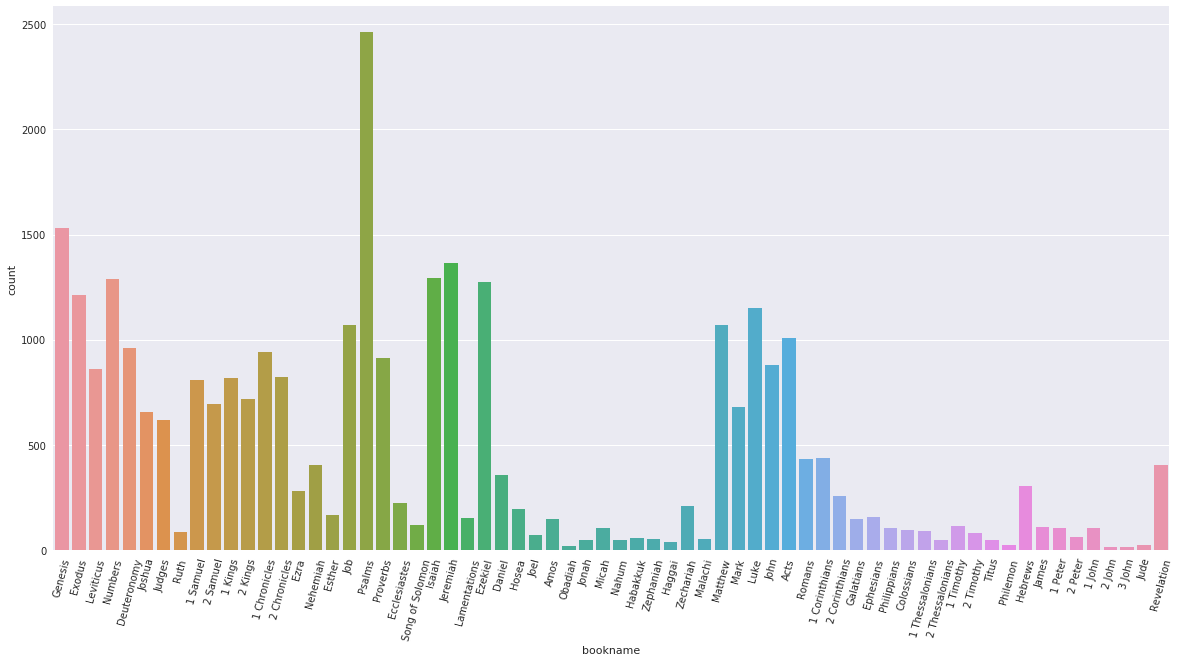

In [476]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=75)
#fig = sns.countplot(x="field.1_y",  hue="field.1",data=tweb)
fig = sns.countplot(x="bookname",data=tweb)

### Plot Genre verse counts using same method

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


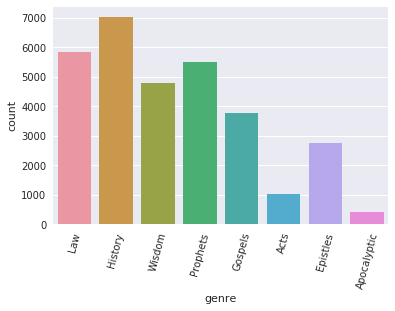

In [477]:
plt.xticks(rotation=75)
fig = sns.countplot(x="genre", data=tweb)

### Use Regex to tokenize words in verses (skipping punctuation)

In [478]:
notpunct = re.compile('\w+')
tweb['verses_nopunct'] = tweb['text'].str.findall(notpunct)
tweb.head()

,id_x,booknum,chnum,versenum,text,bookname,testament,genrenum,bookpad,genre,verses_nopunct
0,01001001,1,1,1,In the beginning God created the heaven and th...,Genesis,OT,1,01,Law,"[In, the, beginning, God, created, the, heaven..."
1,01001002,1,1,2,"And the earth was without form, and void; and ...",Genesis,OT,1,01,Law,"[And, the, earth, was, without, form, and, voi..."
2,01001003,1,1,3,"And God said, Let there be light: and there wa...",Genesis,OT,1,01,Law,"[And, God, said, Let, there, be, light, and, t..."
3,01001004,1,1,4,"And God saw the light, that it was good: and G...",Genesis,OT,1,01,Law,"[And, God, saw, the, light, that, it, was, goo..."
4,01001005,1,1,5,"And God called the light Day, and the darkness...",Genesis,OT,1,01,Law,"[And, God, called, the, light, Day, and, the, ..."


In [479]:
from nltk.corpus import stopwords

In [480]:
english_stops = set(stopwords.words("english"))

In [481]:
def remstopwords(ls):
    stopwt = [word.lower() for word in ls if word.lower() not in english_stops]
    return stopwt

In [482]:
tweb['swverses'] = tweb['verses_nopunct'].apply(remstopwords)

In [483]:
# nltk word_tokenize by default does not remove punctuation
#tweb['words'] = tweb['field.4'].apply(nltk.word_tokenize)
#tweb.head()

In [484]:
tweb.head()

,id_x,booknum,chnum,versenum,text,bookname,testament,genrenum,bookpad,genre,verses_nopunct,swverses
0,01001001,1,1,1,In the beginning God created the heaven and th...,Genesis,OT,1,01,Law,"[In, the, beginning, God, created, the, heaven...","[beginning, god, created, heaven, earth]"
1,01001002,1,1,2,"And the earth was without form, and void; and ...",Genesis,OT,1,01,Law,"[And, the, earth, was, without, form, and, voi...","[earth, without, form, void, darkness, upon, f..."
2,01001003,1,1,3,"And God said, Let there be light: and there wa...",Genesis,OT,1,01,Law,"[And, God, said, Let, there, be, light, and, t...","[god, said, let, light, light]"
3,01001004,1,1,4,"And God saw the light, that it was good: and G...",Genesis,OT,1,01,Law,"[And, God, saw, the, light, that, it, was, goo...","[god, saw, light, good, god, divided, light, d..."
4,01001005,1,1,5,"And God called the light Day, and the darkness...",Genesis,OT,1,01,Law,"[And, God, called, the, light, Day, and, the, ...","[god, called, light, day, darkness, called, ni..."


In [485]:
words = []
sWords = []
for i in tweb['swverses']:
    for j in i:
        sWords.append(j)
for i in tweb['verses_nopunct']:
    for j in i:
        words.append(j)

In [486]:
#sWords

In [487]:
len(words)

791451

In [488]:
len(sWords)

374730

In [489]:
uwords = pd.unique(sWords)
nwords = pd.unique(words)

In [490]:
len(uwords)

12469

In [491]:
removedw = [word for word in nwords if word not in uwords]
#removedw

In [492]:
#len(removedw)
'In' in removedw

True

In [493]:
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder, QuadgramCollocationFinder, ngrams
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures, NgramAssocMeasures

In [494]:
### Getting Error QuadgramAssocMeasures not defined copied below class from NLTK source
class QuadgramAssocMeasures(NgramAssocMeasures):
    """
    A collection of quadgram association measures. Each association measure
    is provided as a function with five arguments::

        trigram_score_fn(n_iiii,
                        (n_iiix, n_iixi, n_ixii, n_xiii),
                        (n_iixx, n_ixix, n_ixxi, n_xixi, n_xxii, n_xiix),
                        (n_ixxx, n_xixx, n_xxix, n_xxxi),
                        n_all)

    The arguments constitute the marginals of a contingency table, counting
    the occurrences of particular events in a corpus. The letter i in the
    suffix refers to the appearance of the word in question, while x indicates
    the appearance of any word. Thus, for example:
    n_iiii counts (w1, w2, w3, w4), i.e. the quadgram being scored
    n_ixxi counts (w1, *, *, w4)
    n_xxxx counts (*, *, *, *), i.e. any quadgram
    """

    _n = 4

    @staticmethod
    def _contingency(n_iiii, n_iiix_tuple, n_iixx_tuple, n_ixxx_tuple, n_xxxx):
        """Calculates values of a quadgram contingency table from
        marginal values.
        """
        (n_iiix, n_iixi, n_ixii, n_xiii) = n_iiix_tuple
        (n_iixx, n_ixix, n_ixxi, n_xixi, n_xxii, n_xiix) = n_iixx_tuple
        (n_ixxx, n_xixx, n_xxix, n_xxxi) = n_ixxx_tuple
        n_oiii = n_xiii - n_iiii
        n_ioii = n_ixii - n_iiii
        n_iioi = n_iixi - n_iiii
        n_ooii = n_xxii - n_iiii - n_oiii - n_ioii
        n_oioi = n_xixi - n_iiii - n_oiii - n_iioi
        n_iooi = n_ixxi - n_iiii - n_ioii - n_iioi
        n_oooi = n_xxxi - n_iiii - n_oiii - n_ioii - n_iioi - n_ooii - n_iooi - n_oioi
        n_iiio = n_iiix - n_iiii
        n_oiio = n_xiix - n_iiii - n_oiii - n_iiio
        n_ioio = n_ixix - n_iiii - n_ioii - n_iiio
        n_ooio = n_xxix - n_iiii - n_oiii - n_ioii - n_iiio - n_ooii - n_ioio - n_oiio
        n_iioo = n_iixx - n_iiii - n_iioi - n_iiio
        n_oioo = n_xixx - n_iiii - n_oiii - n_iioi - n_iiio - n_oioi - n_oiio - n_iioo
        n_iooo = n_ixxx - n_iiii - n_ioii - n_iioi - n_iiio - n_iooi - n_iioo - n_ioio
        n_oooo = n_xxxx - n_iiii - n_oiii - n_ioii - n_iioi - n_ooii - n_oioi - n_iooi - \
                 n_oooi - n_iiio - n_oiio - n_ioio - n_ooio - n_iioo - n_oioo - n_iooo

        return (n_iiii, n_oiii, n_ioii, n_ooii, n_iioi,
                n_oioi, n_iooi, n_oooi, n_iiio, n_oiio,
                n_ioio, n_ooio, n_iioo, n_oioo, n_iooo, n_oooo)

    @staticmethod
    def _marginals(*contingency):
        """Calculates values of contingency table marginals from its values.
        QuadgramAssocMeasures._marginals(1, 0, 2, 46, 552, 825, 2577, 34967, 1, 0, 2, 48, 7250, 9031, 28585, 356653)
        (1, (2, 553, 3, 1), (7804, 6, 3132, 1378, 49, 2), (38970, 17660, 100, 38970), 440540)
        """
        n_iiii, n_oiii, n_ioii, n_ooii, n_iioi, n_oioi, n_iooi, n_oooi, n_iiio, n_oiio, n_ioio, n_ooio, \
        n_iioo, n_oioo, n_iooo, n_oooo = contingency

        n_iiix = n_iiii + n_iiio
        n_iixi = n_iiii + n_iioi
        n_ixii = n_iiii + n_ioii
        n_xiii = n_iiii + n_oiii

        n_iixx = n_iiii + n_iioi + n_iiio + n_iioo
        n_ixix = n_iiii + n_ioii + n_iiio + n_ioio
        n_ixxi = n_iiii + n_ioii + n_iioi + n_iooi
        n_xixi = n_iiii + n_oiii + n_iioi + n_oioi
        n_xxii = n_iiii + n_oiii + n_ioii + n_ooii
        n_xiix = n_iiii + n_oiii + n_iiio + n_oiio

        n_ixxx = n_iiii + n_ioii + n_iioi + n_iiio + n_iooi + n_iioo + n_ioio + n_iooo
        n_xixx = n_iiii + n_oiii + n_iioi + n_iiio + n_oioi + n_oiio + n_iioo + n_oioo
        n_xxix = n_iiii + n_oiii + n_ioii + n_iiio + n_ooii + n_ioio + n_oiio + n_ooio
        n_xxxi = n_iiii + n_oiii + n_ioii + n_iioi + n_ooii + n_iooi + n_oioi + n_oooi

        n_all = sum(contingency)

        return (n_iiii,
                (n_iiix, n_iixi, n_ixii, n_xiii),
                (n_iixx, n_ixix, n_ixxi, n_xixi, n_xxii, n_xiix),
                (n_ixxx, n_xixx, n_xxix, n_xxxi),
                n_all)

In [495]:
#bcf = BigramCollocationFinder.from_words(sWords)
#tcf = TrigramCollocationFinder.from_words(words)
#qcf = QuadgramCollocationFinder.from_words(words)
#scf = ngrams



In [496]:
#bigrams = [b for b in bcf.nbest(BigramAssocMeasures.likelihood_ratio,len(sWords))]
#trigrams = [t for t in tcf.nbest(TrigramAssocMeasures.likelihood_ratio,len(words))]
#quadgrams = [q for q in qcf.nbest(QuadgramAssocMeasures.likelihood_ratio,len(words))]


### Adds column of word counts to each row

In [497]:
tweb['wordcount'] = tweb['verses_nopunct'].apply(len)

In [498]:
#tweb.drop(['field.3_y','field'],axis=1,inplace=True)
tweb.drop(['genrenum'],axis=1,inplace=True)

In [499]:
tweb.columns = ["id","booknum","chnum","versenum","text","bookname","testament","bookpad","genre","versearr","sversearr","wordcount"]

In [500]:
tweb.head()

,id,booknum,chnum,versenum,text,bookname,testament,bookpad,genre,versearr,sversearr,wordcount
0,01001001,1,1,1,In the beginning God created the heaven and th...,Genesis,OT,01,Law,"[In, the, beginning, God, created, the, heaven...","[beginning, god, created, heaven, earth]",10
1,01001002,1,1,2,"And the earth was without form, and void; and ...",Genesis,OT,01,Law,"[And, the, earth, was, without, form, and, voi...","[earth, without, form, void, darkness, upon, f...",29
2,01001003,1,1,3,"And God said, Let there be light: and there wa...",Genesis,OT,01,Law,"[And, God, said, Let, there, be, light, and, t...","[god, said, let, light, light]",11
3,01001004,1,1,4,"And God saw the light, that it was good: and G...",Genesis,OT,01,Law,"[And, God, saw, the, light, that, it, was, goo...","[god, saw, light, good, god, divided, light, d...",17
4,01001005,1,1,5,"And God called the light Day, and the darkness...",Genesis,OT,01,Law,"[And, God, called, the, light, Day, and, the, ...","[god, called, light, day, darkness, called, ni...",22


In [501]:
# remove text arrays for export to file
temparr_df = tweb.drop(['versearr','sversearr'],axis=1)
temparr_df.head()

,id,booknum,chnum,versenum,text,bookname,testament,bookpad,genre,wordcount
0,01001001,1,1,1,In the beginning God created the heaven and th...,Genesis,OT,01,Law,10
1,01001002,1,1,2,"And the earth was without form, and void; and ...",Genesis,OT,01,Law,29
2,01001003,1,1,3,"And God said, Let there be light: and there wa...",Genesis,OT,01,Law,11
3,01001004,1,1,4,"And God saw the light, that it was good: and G...",Genesis,OT,01,Law,17
4,01001005,1,1,5,"And God called the light Day, and the darkness...",Genesis,OT,01,Law,22


### Export main verse data to tsv

In [502]:
#temparr_df.to_csv('twebdata.tsv',sep='\t')
temparr_df.to_csv('kjvdata.tsv',sep='\t')

In [503]:
#wdf = pd.DataFrame(sWords)

In [504]:
#wdf.columns = ['words']
#wdf.head()

In [505]:
uwdf = pd.DataFrame(uwords)
uwdf.head()

,0
0,beginning
1,god
2,created
3,heaven
4,earth


In [506]:
#wdf['vlocations'] = [[tweb.iloc[el]['id'] for i,el in enumerate(tweb) if x in el['sversearr']] for x in sWords]

In [507]:
len(tweb)

31103

In [508]:
wordmat = tweb['sversearr']
wordlists = []
for i in wordmat:
    wordlists = wordlists+i

In [509]:
#wordlists

In [510]:
wordlocs = []
for i in uwords:
    wlocs = []
    for j,el in enumerate(wordmat):
        if i in el:
            wlocs.append(j)
    wordlocs.append(wlocs)
            

In [511]:
#wordlocs
#[print(i) for i in tweb['id'][:3000]]

In [512]:
'''
def addlocations(ls):
    locations = []
    for i in uwords:
        wlocs = []
        for j in range(len(ls)):
            if i in ls.iloc[j]['sversearr']:
                wlocs.append(ls.iloc[j]['id'])
                #print(i)
    locations.append(wlocs)
    return locations
    
locmat[0]
'''

"\ndef addlocations(ls):\n    locations = []\n    for i in uwords:\n        wlocs = []\n        for j in range(len(ls)):\n            if i in ls.iloc[j]['sversearr']:\n                wlocs.append(ls.iloc[j]['id'])\n                #print(i)\n    locations.append(wlocs)\n    return locations\n    \nlocmat[0]\n"

In [513]:
wordids = []
for i in wordlocs:
    ids = []
    for j in i:
        ids.append(tweb.iloc[j]['id'])
    wordids.append(ids)

In [514]:
wordids[0][0:20]

['01001001',
 '01010010',
 '01013003',
 '01041021',
 '01049003',
 '02012002',
 '05011012',
 '05021017',
 '05032042',
 '07007019',
 '08001022',
 '08003010',
 '10021009',
 '10021010',
 '12017025',
 '13017009',
 '15004006',
 '18008007',
 '18042012',
 '19111010']

In [515]:
uwdf['wlocations'] = wordids
uwdf.columns = ['uwords','wlocations']
uwdf.head()

,uwords,wlocations
0,beginning,"[01001001, 01010010, 01013003, 01041021, 01049..."
1,god,"[01001001, 01001002, 01001003, 01001004, 01001..."
2,created,"[01001001, 01001021, 01001027, 01002003, 01002..."
3,heaven,"[01001001, 01001008, 01001009, 01001014, 01001..."
4,earth,"[01001001, 01001002, 01001010, 01001011, 01001..."


In [516]:

def getbookcounts(d):
    narr = []
    for j in key['bookpad']:
        counter = 0
        for i in d:
            if str(i)[:2] == j:
                counter+=1
        narr.append(counter)
    return narr

In [517]:
bookc = uwdf['wlocations'].apply(getbookcounts)
#bookc.head()

In [518]:
bookc.head()

0    [5, 1, 0, 0, 3, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, ...
1    [202, 95, 48, 33, 298, 63, 55, 2, 87, 59, 84, ...
2    [8, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [29, 14, 1, 0, 34, 4, 3, 0, 2, 4, 15, 14, 3, 2...
4    [97, 20, 9, 10, 36, 9, 5, 0, 17, 17, 16, 5, 13...
Name: wlocations, dtype: object

In [519]:
uwdf['bookcounts'] = bookc


In [520]:
uwdf.head()

,uwords,wlocations,bookcounts
0,beginning,"[01001001, 01010010, 01013003, 01041021, 01049...","[5, 1, 0, 0, 3, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, ..."
1,god,"[01001001, 01001002, 01001003, 01001004, 01001...","[202, 95, 48, 33, 298, 63, 55, 2, 87, 59, 84, ..."
2,created,"[01001001, 01001021, 01001027, 01002003, 01002...","[8, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,heaven,"[01001001, 01001008, 01001009, 01001014, 01001...","[29, 14, 1, 0, 34, 4, 3, 0, 2, 4, 15, 14, 3, 2..."
4,earth,"[01001001, 01001002, 01001010, 01001011, 01001...","[97, 20, 9, 10, 36, 9, 5, 0, 17, 17, 16, 5, 13..."


In [521]:
print(uwdf.wlocations[0])


['01001001', '01010010', '01013003', '01041021', '01049003', '02012002', '05011012', '05021017', '05032042', '07007019', '08001022', '08003010', '10021009', '10021010', '12017025', '13017009', '15004006', '18008007', '18042012', '19111010', '19119160', '20001007', '20008022', '20008023', '20009010', '20017014', '20020021', '21003011', '21007008', '21010013', '23001026', '23018002', '23018007', '23040021', '23041004', '23041026', '23046010', '23048003', '23048005', '23048007', '23048016', '23064004', '24017012', '24026001', '24027001', '24028001', '24049034', '25002019', '26040001', '27009021', '27009023', '28001002', '30007001', '33001013', '40014030', '40019004', '40019008', '40020008', '40024008', '40024021', '41001001', '41010006', '41013019', '42001002', '42023005', '42024027', '42024047', '43001001', '43001002', '43002010', '43002011', '43006064', '43008009', '43008025', '43008044', '43015027', '43016004', '44001022', '44011004', '44011015', '44015018', '44026005', '49003009', '50

In [522]:
#uwdf.to_csv('wordlocs.tsv',sep='\t')
uwdf.to_csv('wordlocs_kjv.tsv',sep='\t')

In [523]:
#locmat = addlocations(tweb)

In [524]:
#locmat

### Using similar method as plotting counts with groupby to create a new dataset with rows for each book rather than verses.

In [525]:
wordsum = []
df = tweb.groupby('bookname',sort=False).sum()
df = df.reset_index()
df.head()


,bookname,booknum,chnum,versenum,wordcount
0,Genesis,1533,41015,26798,38524
1,Exodus,2426,26273,20462,32769
2,Leviticus,2577,13040,16412,24629
3,Numbers,5152,22738,28038,32945
4,Deuteronomy,4795,16370,16071,28402


In [526]:
df.drop(['id','booknum','chnum','versenum'],axis=1,inplace=True)

ValueError: labels ['id'] not contained in axis

In [527]:
range(len(df))

range(0, 66)

### Function to be applied to verse data set (tweb) iteratively to create a separate data frame of verses for each book and store them in a list. 

In [528]:
def splitbybook(data,num):
    book = data[data['booknum'] == num]
    return book

### Applies splitbybook function in a loop using index of book data set to aggregate verses matching each book

In [529]:
booklist = []
for i in range(len(df)):
    booklist.append(splitbybook(tweb,i+1))


In [530]:
booklist[-1].iloc[-1]

id                                                    66022021
booknum                                                     66
chnum                                                       22
versenum                                                    21
text         The grace of our Lord Jesus Christ be with you...
bookname                                            Revelation
testament                                                   NT
bookpad                                                     66
genre                                              Apocalyptic
versearr     [The, grace, of, our, Lord, Jesus, Christ, be,...
sversearr                   [grace, lord, jesus, christ, amen]
wordcount                                                   12
Name: 31102, dtype: object

### looping through list of book dataframes grabbing the chapter number of the last element in each to create a column of number of chapters in book dataframe

In [531]:
df['chaptercount'] = [i.iloc[-1]['chnum'] for i in booklist]
df.head()

,bookname,booknum,chnum,versenum,wordcount,chaptercount
0,Genesis,1533,41015,26798,38524,50
1,Exodus,2426,26273,20462,32769,40
2,Leviticus,2577,13040,16412,24629,27
3,Numbers,5152,22738,28038,32945,36
4,Deuteronomy,4795,16370,16071,28402,34


In [532]:
pd.unique(booklist[0]['chnum'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [533]:
len(tweb)

31103

### A more functional approach to getting counts of verses in each chapter
#### Using chaptercounts calculated prior as an counter reset to loop through verses for chapters creating a matrix of verse counts for each chapter in each book

In [534]:
versecountlist = []
pos = 0
for i in df.chaptercount:
    versecounts = []
    for j in range(1,i+1):
        counter = 0
        while tweb.iloc[pos]['chnum'] <= i:
            if tweb.iloc[pos]['chnum'] == j:
                pos+=1
                counter+=1
            else: 
                break
            if pos > len(tweb)-1:break
        versecounts.append(counter)
    versecountlist.append(versecounts)

            
        

In [535]:
#versecountlist

### Concatenating versecount matrix to book dataset

In [536]:
#booklist[1][booklist[1]['field.2_x'] == 2]
df['versecounts'] = versecountlist
df.head()


,bookname,booknum,chnum,versenum,wordcount,chaptercount,versecounts
0,Genesis,1533,41015,26798,38524,50,"[31, 25, 24, 26, 32, 22, 24, 22, 29, 32, 32, 2..."
1,Exodus,2426,26273,20462,32769,40,"[22, 25, 22, 31, 23, 30, 25, 32, 35, 29, 10, 5..."
2,Leviticus,2577,13040,16412,24629,27,"[17, 16, 17, 35, 19, 30, 38, 36, 24, 20, 47, 8..."
3,Numbers,5152,22738,28038,32945,36,"[54, 34, 51, 49, 31, 27, 89, 26, 23, 36, 35, 1..."
4,Deuteronomy,4795,16370,16071,28402,34,"[46, 37, 29, 49, 33, 25, 26, 20, 29, 22, 32, 3..."


In [537]:
test1 = pd.DataFrame(df.iloc[0]['versecounts']).reset_index()
type(test1[0][0])

numpy.int64

### Plotting word counts by book

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


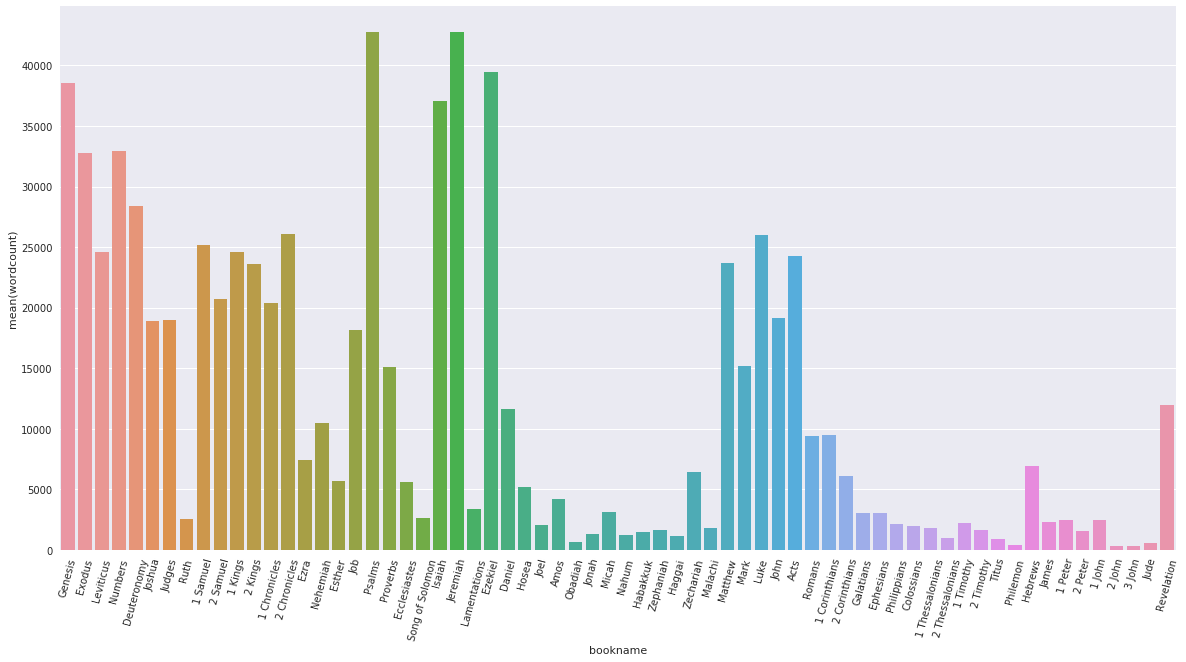

In [538]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=75)
fig = sns.barplot(y='wordcount', x='bookname', data=df)

### Plotting chapter counts by book

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


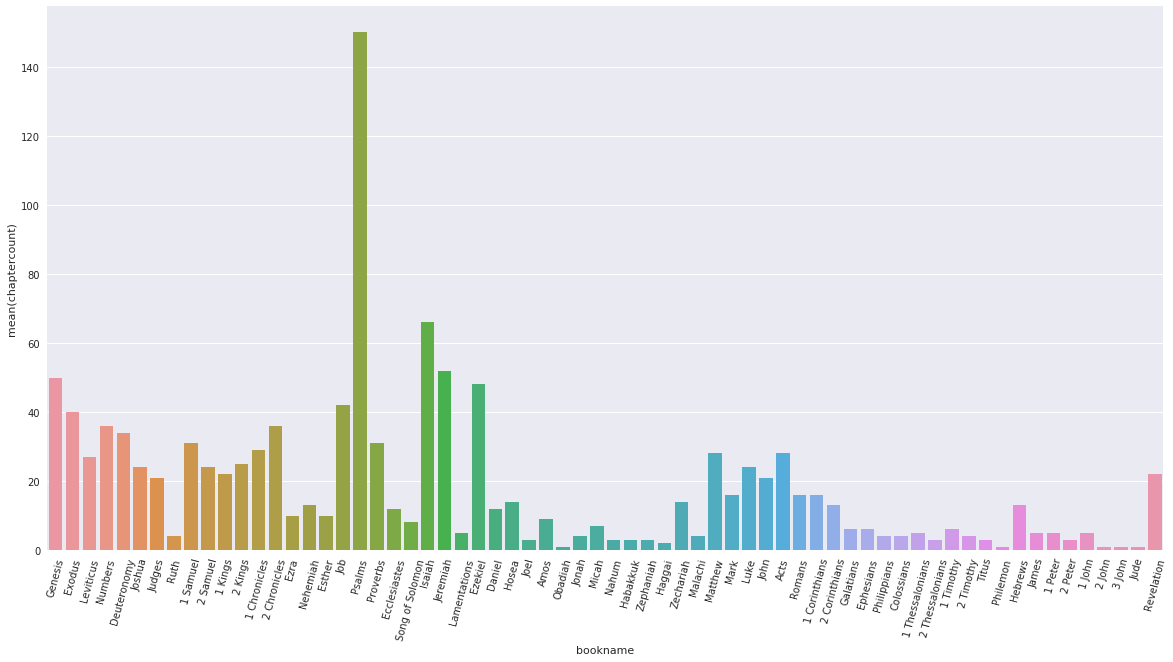

In [539]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=75)
fig = sns.barplot(y='chaptercount', x='bookname', data=df)

In [540]:
#for i in len(df):
#fig = plt.figure()
#fig.subplots_adjust(hspace=0.4, wspace=0.4)
#plotlist = []
#for i in range(1,df.iloc[0]['chaptercount']+1):
    #plotlist.append(fig.add_subplot(5,df.iloc[0]['chaptercount']/5,i))
    #plotlist[i-1].plot(df.iloc[0]['versecounts'][i-1])

'''
for k in range(len(df)):
    chpos = 0
    fig,ax =  plt.subplots(int(math.sqrt(int(df.iloc[k]['chaptercount'])))+1,int(math.sqrt(int(df.iloc[k]['chaptercount'])))+1, sharex='col', sharey='row', figsize=(20,10))
    for i in range(int(math.sqrt(int(df.iloc[k]['chaptercount'])))):
        for j in range(int(math.sqrt(int(df.iloc[k]['chaptercount'])))):
        #for j in range(int(df.iloc[k]['chaptercount']/5)):
            #print(int(str(i)+str(j))+1)
            if chpos <= df.iloc[k]['chaptercount']: 
                ax[i, j].bar(df.iloc[k]['chaptercount'], df.iloc[k]['versecounts'][chpos])
                chpos+=1
                #ax[i, j].bar(df.iloc[k]['chaptercount'], df.iloc[k]['versecounts'][int(str(i)+str(j))])
'''

"\nfor k in range(len(df)):\n    chpos = 0\n    fig,ax =  plt.subplots(int(math.sqrt(int(df.iloc[k]['chaptercount'])))+1,int(math.sqrt(int(df.iloc[k]['chaptercount'])))+1, sharex='col', sharey='row', figsize=(20,10))\n    for i in range(int(math.sqrt(int(df.iloc[k]['chaptercount'])))):\n        for j in range(int(math.sqrt(int(df.iloc[k]['chaptercount'])))):\n        #for j in range(int(df.iloc[k]['chaptercount']/5)):\n            #print(int(str(i)+str(j))+1)\n            if chpos <= df.iloc[k]['chaptercount']: \n                ax[i, j].bar(df.iloc[k]['chaptercount'], df.iloc[k]['versecounts'][chpos])\n                chpos+=1\n                #ax[i, j].bar(df.iloc[k]['chaptercount'], df.iloc[k]['versecounts'][int(str(i)+str(j))])\n"

In [541]:
df.head()

,bookname,booknum,chnum,versenum,wordcount,chaptercount,versecounts
0,Genesis,1533,41015,26798,38524,50,"[31, 25, 24, 26, 32, 22, 24, 22, 29, 32, 32, 2..."
1,Exodus,2426,26273,20462,32769,40,"[22, 25, 22, 31, 23, 30, 25, 32, 35, 29, 10, 5..."
2,Leviticus,2577,13040,16412,24629,27,"[17, 16, 17, 35, 19, 30, 38, 36, 24, 20, 47, 8..."
3,Numbers,5152,22738,28038,32945,36,"[54, 34, 51, 49, 31, 27, 89, 26, 23, 36, 35, 1..."
4,Deuteronomy,4795,16370,16071,28402,34,"[46, 37, 29, 49, 33, 25, 26, 20, 29, 22, 32, 3..."


In [542]:
counter = 0
ncol = []
for i in range(len(df)):
    mat = []
    for j in range(len(df.iloc[i]['versecounts'])):
        lists = []
        for k in range(df.iloc[i]['versecounts'][j]):
            lists.append(tweb.iloc[counter]['id'])
            counter+=1
        mat.append(lists)
    ncol.append(mat)
            

In [543]:
df['verseidmatrix'] = ncol

In [544]:
df.head()

,bookname,booknum,chnum,versenum,wordcount,chaptercount,versecounts,verseidmatrix
0,Genesis,1533,41015,26798,38524,50,"[31, 25, 24, 26, 32, 22, 24, 22, 29, 32, 32, 2...","[[01001001, 01001002, 01001003, 01001004, 0100..."
1,Exodus,2426,26273,20462,32769,40,"[22, 25, 22, 31, 23, 30, 25, 32, 35, 29, 10, 5...","[[02001001, 02001002, 02001003, 02001004, 0200..."
2,Leviticus,2577,13040,16412,24629,27,"[17, 16, 17, 35, 19, 30, 38, 36, 24, 20, 47, 8...","[[03001001, 03001002, 03001003, 03001004, 0300..."
3,Numbers,5152,22738,28038,32945,36,"[54, 34, 51, 49, 31, 27, 89, 26, 23, 36, 35, 1...","[[04001001, 04001002, 04001003, 04001004, 0400..."
4,Deuteronomy,4795,16370,16071,28402,34,"[46, 37, 29, 49, 33, 25, 26, 20, 29, 22, 32, 3...","[[05001001, 05001002, 05001003, 05001004, 0500..."


In [545]:
#df.to_csv('bookwordcount.tsv',sep='\t')
df.to_csv('bookwordcount_kjv.tsv',sep='\t')